In [4]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense#, LSTM, Bidirectional
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
import json

## Mempersiapkan Dataset

In [5]:
df1 = pd.read_csv('depression (1).csv')
df1.head()

,text,label
0,khawatir khawatir dengan gelisah,1.0
1,Bulan Kalender benar -benar kesalahan bodoh se...,1.0
2,Aku mual,1.0
3,Tahan tidur dengan gelisah duduk dengan gelisa...,1.0
4,Tolong sangat cemas cemas,1.0


In [6]:
df2 = df1.astype(str)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16361 entries, 0 to 16360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16361 non-null  object
 1   label   16361 non-null  object
dtypes: object(2)
memory usage: 255.8+ KB


In [8]:
df2['label']=df2['label'].astype(float)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16361 entries, 0 to 16360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    16361 non-null  object 
 1   label   16361 non-null  float64
dtypes: float64(1), object(1)
memory usage: 255.8+ KB


In [10]:
df2.head()

,text,label
0,khawatir khawatir dengan gelisah,1.0
1,Bulan Kalender benar -benar kesalahan bodoh se...,1.0
2,Aku mual,1.0
3,Tahan tidur dengan gelisah duduk dengan gelisa...,1.0
4,Tolong sangat cemas cemas,1.0


In [11]:
df2['label']=df2['label'].astype(int)

In [12]:
df2.head()

,text,label
0,khawatir khawatir dengan gelisah,1
1,Bulan Kalender benar -benar kesalahan bodoh se...,1
2,Aku mual,1
3,Tahan tidur dengan gelisah duduk dengan gelisa...,1
4,Tolong sangat cemas cemas,1


In [13]:
df2.tail()

,text,label
16356,gasedih penonton gaperlu cemas mengkasihani me...,0
16357,menyesali dendammarah halhal menaruh cemas ket...,0
16358,kekhawatiran berlebih stres tenang paranoid re...,0
16359,gelisah beban pikiran langsung dengarkan podca...,0
16360,astagfirullahastagfirullahastagfirullahngantuk...,0


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16361 entries, 0 to 16360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16361 non-null  object
 1   label   16361 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 255.8+ KB


### Melakukan split dataset

In [15]:
text = df2['text'].values
label = df2['label'].values

In [16]:
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2, shuffle=False)

print('Training dataset:\n', text_train.shape, label_train.shape)
print('\nTest dataset:\n', text_test.shape, label_test.shape)

Training dataset:
 (13088,) (13088,)

Test dataset:
 (3273,) (3273,)


### Membuat tokenisasi

In [17]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")

tokenizer.fit_on_texts(text_train)

In [18]:
word_index_depresi = tokenizer.word_index
print(len(word_index_depresi))

13900


In [19]:
# Menyimpan word_index kedalam sebuah file json

with open('word_index_depresi.json', 'w') as fp:
    json.dump(word_index_depresi, fp)

### Membuat sequences dan melakukan padding

In [20]:
train_sekuens = tokenizer.texts_to_sequences(text_train)
test_sekuens = tokenizer.texts_to_sequences(text_test)


train_padded = pad_sequences(train_sekuens, 
                             maxlen=200,
                             padding='post',
                             truncating='post')
test_padded = pad_sequences(test_sekuens,
                            maxlen=200,
                            padding='post',
                            truncating='post')

In [21]:
label_train.shape

(13088,)

In [22]:
train_padded.shape

(13088, 200)

In [23]:
test_padded.shape

(3273, 200)

## Membuat Model

In [24]:
model = tf.keras.Sequential([
    Embedding(10000, 200, input_length=200),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 200)          2000000   
                                                                 
 global_average_pooling1d (G  (None, 200)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                12864     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,014,977
Trainable params: 2,014,977
Non-trainable params: 0
______________________________________________

In [25]:
from tensorflow.keras.optimizers import Adam

In [26]:
model.compile(optimizer=Adam(learning_rate = 1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Melatih Model

In [27]:
num_epochs = 30
history = model.fit(train_padded, label_train, 
                    epochs=num_epochs, 
                    validation_data=(test_padded, label_test),
                    verbose=1)

Epoch 1/30
409/409 [==============================] - 5s 5ms/step - loss: 0.6904 - accuracy: 0.5550 - val_loss: 0.7297 - val_accuracy: 0.0000e+00
Epoch 2/30
409/409 [==============================] - 2s 4ms/step - loss: 0.6800 - accuracy: 0.6309 - val_loss: 0.7706 - val_accuracy: 0.0000e+00
Epoch 3/30
409/409 [==============================] - 2s 4ms/step - loss: 0.6719 - accuracy: 0.6309 - val_loss: 0.8210 - val_accuracy: 0.0000e+00
Epoch 4/30
409/409 [==============================] - 2s 4ms/step - loss: 0.6653 - accuracy: 0.6309 - val_loss: 0.8656 - val_accuracy: 0.0000e+00
Epoch 5/30
409/409 [==============================] - 2s 4ms/step - loss: 0.6611 - accuracy: 0.6309 - val_loss: 0.9052 - val_accuracy: 0.0000e+00
Epoch 6/30
409/409 [==============================] - 2s 5ms/step - loss: 0.6586 - accuracy: 0.6309 - val_loss: 0.9358 - val_accuracy: 0.0000e+00
Epoch 7/30
409/409 [==============================] - 2s 4ms/step - loss: 0.6571 - accuracy: 0.6309 - val_loss: 0.9560 - val

## Evaluasi Model

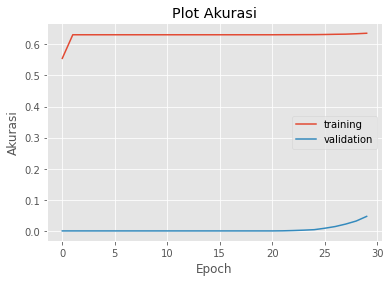

In [28]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), history.history["accuracy"], label="training")
plt.plot(np.arange(0, num_epochs), history.history["val_accuracy"], label="validation")
plt.title("Plot Akurasi")
plt.xlabel("Epoch")
plt.ylabel("Akurasi")
plt.legend()
plt.show()

Berdasarkan plot tersebut dapat dilihat bahwa model yang digunakan masih sangat overfit 

## Save Model

In [29]:
model.save("model_depresi2.h5")

## Convert Model

In [30]:
# Install tensorflowjs

!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 KB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 95.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 KB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 122.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 91.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━

In [32]:
# mengubah model.h5 kedalam bentuk json
!tensorflowjs_converter --input_format=keras model_depresi2.h5 tfjs_model

2023-01-29 23:06:28.787784: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-01-29 23:06:28.787887: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-01-29 23:06:28.787906: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
